#### Question 2

* What kind of model is appropriate in this case considering the graphs?
* How to do feature selection?
* How to measure the performance of the model?
* How to interpret the result?


In [131]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn import metrics, svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import style
style.use("ggplot")
%matplotlib inline


Importing dataset

In [2]:
df = pd.read_csv('/Users/Gene/Documents/Job Applications/Pulsifi/test.csv')
df= df.drop(columns=('Unnamed: 0'))
df.head()

,x,y,z
0,0.824922,0.812338,0.698686
1,0.288478,0.697308,0.544378
2,0.586509,0.715296,0.655423
3,0.225562,0.355839,0.542703
4,0.030121,-0.097980,0.389870


In [43]:
df.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,0.499059,0.493749,0.496727
std,0.287739,0.346935,0.354016
min,0.000070,-0.405017,-0.396111
25%,0.248916,0.230222,0.236340
50%,0.489521,0.485361,0.501613
75%,0.745500,0.756520,0.755619
max,0.999722,1.387614,1.373976


In [102]:
df.isna().sum()

x    0
y    0
z    0
dtype: int64

In [4]:
df.shape

(1000, 3)

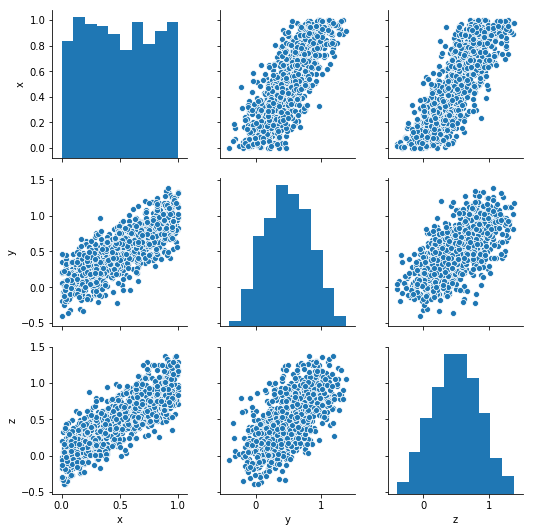

In [5]:
sns.pairplot(df)

#### Plots

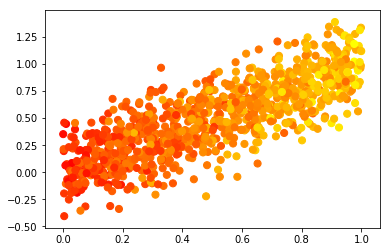

In [110]:
# df.iloc[:, 0]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn');

z against x 

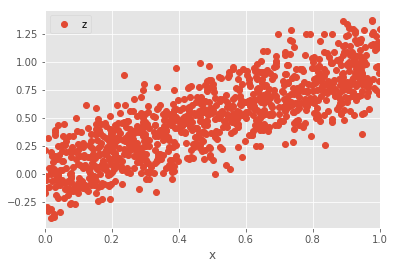

In [115]:
df.plot(x='x', y='z', style='o')

x against z

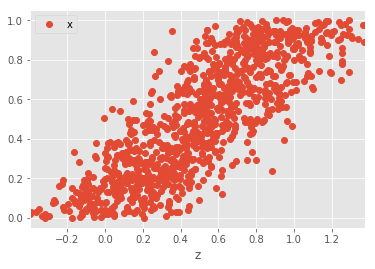

In [116]:
df.plot(x='z', y='x', style='o')

### Methodology

Typically we would want to explore whether there is a relationship between regressors and predicted variable in the data first, i.e.:
* Are the variables (x, y, z) correlated?
* How strong is that relationship?
* Which one contributes strongly?

But the issue is that we don't know what x, y and z represents. At best we can provide some intuition and assumption. It also might be worth noting that x may possibly be an output of a logistic regression when it is plotted against z. More context would be better to understand the nature of the data, but given such limited info, will look at interpretabilty of the results and whether it makes sense

#### Simple Linear Regression Model (and Ordinary Least Squares)

A few assumptions are already made under the OLS model such that: 

* A1. The linear regression model is “linear in parameters.”
* A2. There is a random sampling of observations.
* A3. The conditional mean should be zero.
* A4. There is no multi-collinearity (or perfect collinearity).
* A5. Spherical errors: There is homoscedasticity and no autocorrelation
* A6: Optional Assumption: Error terms should be normally distributed.

Since we want to look for the best model, as preliminary efforts, we should take into consideration the relationship between variables. This allows us to look at statistical relationships instead of deterministic ones. The core of this is to obtain a best fit line in which total prediction errors are minimised. 

The line of reasoning is as follows: there is no point trying all the other complex models and looking for the model with best score if we dont have much context to it. It is also possible to find for example the fish stock supply in South America as a predictor for the stock market prices in the US. This may generate good performance but it may not make the most sense. 



In answering the question, I will start with the simplest linear regression, the OLS and compare it with the scikitlearn model. 
And look at why that differs in terms of results and how do we interpret those results.

In [184]:
X = df[['x', 'y']]
y = df['z']

lr_model = LinearRegression()
lr_model.fit(X, y)

print(lr_model.__dict__, '\n')

print('Intercept: ', lr_model.intercept_)
print('Coef: ', lr_model.coef_, '\n')


### OLS 
# X = sm.add_constant(X)   
ols_model = sm.OLS(y, X).fit()
predictions = ols_model.predict(X) # make the predictions by the model

# # Print out the statistics
print('ols_model_summary: ', ols_model.summary(), '\n')

# print the coefficients
# ols_model.params

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'coef_': array([ 1.02963337, -0.02557652]), '_residues': 41.72515100390966, 'rank_': 2, 'singular_': array([13.60213484,  4.23511544]), 'intercept_': -0.004492947950029247} 

Intercept:  -0.004492947950029247
Coef:  [ 1.02963337 -0.02557652] 

ols_model_summary:                              OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     3949.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:49:33   Log-Likelihood:                 169.33
No. Observations:                1000   AIC:                            -334.7
Df Residuals:                     998   BIC:                            -324.8
Df Model:                   

As evident, the intercept is not included in the OLS model which is where it differs

#### Interpreting model coefficients

A *unit* increase in x is associated with a 1.02963337 *unit* increase, on average, in z 

and a *unit* increase in y is associated with a 0.025577 *unit* decrease, on average, in z 

#### Model Predictions

Taking a sample and calculating manually

In [179]:
df.sample(1)

,x,y,z
983,0.293632,-0.050789,0.151593


In [185]:
manual_y_pred = -0.004492947950029247 + 1.02963337*0.231779 -0.02557652*0.420344
manual_y_pred


0.22340350819232077

In [186]:
X_manual_new = pd.DataFrame({'x':[0.293632], 'y':[-0.050789]})
ols_model.predict(X_manual_new)

0    0.301672
dtype: float64

In [187]:
lr_model.predict(X_manual_new)

array([0.29913936])

### Plotting Least Squares

/Users/gene/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


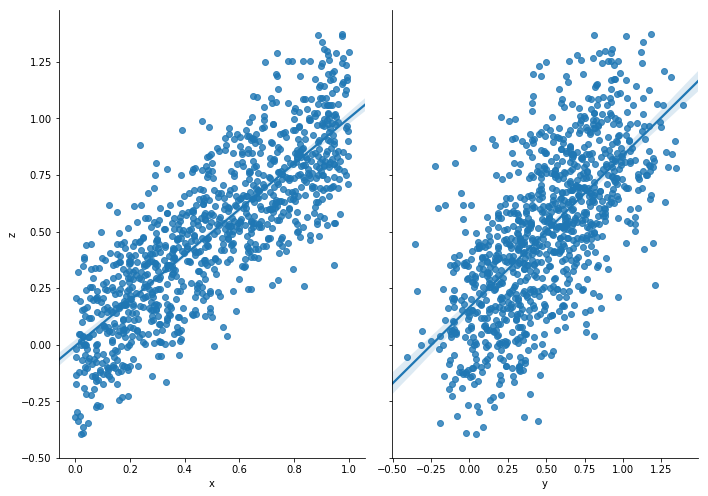

In [31]:
sns.pairplot(df, x_vars=['x','y'], y_vars='z', height=7, aspect=0.7, kind='reg')

#### Confidence in model

In [73]:
## ols models 

# print the confidence intervals for the model coefficients
ols_model.conf_int()

,0,1
x,0.956589,1.089302
y,-0.088996,0.037700


We only have a single sample of data and not the entire population. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within

Under repeated sampling, the line will stay roughly in the same place (low variance) but the average of those models won't do a great job capturing the true relationship (high bias). If the population from which this sample was drawn was sampled 100 times approximately 95 of those confidence intervals would contain the "true" coefficient

#### Hypothesis Testing and p-Values

In [79]:
ols_model.pvalues

x    3.444056e-143
y     4.270921e-01
dtype: float64

In this case, the p-value for y is far greater than 0.05. So we fail to reject the null hypothesis that there is no relationship between the regressors and predicted variables. We generally ignore the p-value for the intercept

#### How well does the model fit the data

Since R^2 measures the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model, we use this as an estimate of overall fit of the model

In [188]:
## ols model 
print('ols model: ', ols_model.rsquared)

## sklearn
print('lr_model: ', lr_model.score(X, y))

ols model:  0.8878037428345787
lr_model:  0.6667366806382224


Going by this metric, the ols model performs better but whether we can confidently say it or not depends on the threshold, which varies according to domain

### How to do feature selection?

* Try different models
* Keep features in the model if they have small p-values
* Reject null hypothesis
* Relationship exists
* Check whether the R-squared value goes up when you add new features

However linear models depend on many assumptions such as the ones listed above for OLS. Very quickly due to the nature of how the dataset was obtained many of these assumptions break down

In [192]:
X = sm.add_constant(X)   
multi_ols_model = sm.OLS(y, X).fit()
multi_ols_model.rsquared

/Users/gene/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.6667366806382224

### Model Evaluation Metrics

Use train_test_split to check if other variables should be retained. Given that there are only 2 regressors, it is possible to loose a lot of information if we were to drop one of the variables

#### Better solution to use train, test, split and scale the data before using SVM but given that the distribution of data looks pretty normal, but as best practice, we scale it anyway

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)
print('Test set RMSE: '+ str(test_set_rmse))
print('Test set R2: '+ str(test_set_r2))



Test set RMSE: 0.21141075735639195
Test set R2: 0.6230945878045628


In [32]:
# 3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(pd.DataFrame(X))
# y = y.values.reshape(-1, 1)
y = sc_y.fit_transform(pd.DataFrame(y))


/Users/gene/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### Testing with SVM

It's also possible to cluster the date first with SVM and use either a linear or rbf kernel just to speed things up without much of a trade off in accuracy

### SVM

In [ ]:
#4 Fitting the Support Vector Regression Model to the dataset
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


In [ ]:
#5 Predicting a new result